In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn import linear_model
import numpy as np

In [2]:
compressed_size_batches = pd.read_csv("./data/csv/661k_compressed_size.csv",header=None, sep = "\t", 
                                      names = ['size_Mb','name'], index_col = 'name')
compressed_size_batches.index = [i[2:-7] for i in compressed_size_batches.index]

distinct_31mers_batches = pd.read_csv("./data/csv/distinct_31mers_661k.csv", sep = ",")
distinct_31mers_batches.columns =["species","distinct_31mers"]
distinct_31mers_batches = distinct_31mers_batches.set_index("species")

In [3]:
merged_df = pd.merge(compressed_size_batches, distinct_31mers_batches, left_index=True, right_index=True)

In [4]:
tuberculosis_df = merged_df.loc[merged_df.index.str.contains('mycobacterium_tuberculosis')]

In [5]:
tuberculosis_df

,size_Mb,distinct_31mers
mycobacterium_tuberculosis__01,89,212738112.0
mycobacterium_tuberculosis__02,58,130080048.0
mycobacterium_tuberculosis__03,146,508730912.0
mycobacterium_tuberculosis__04,81,200019264.0
mycobacterium_tuberculosis__05,76,191255760.0
mycobacterium_tuberculosis__06,90,239203296.0
mycobacterium_tuberculosis__07,160,438626624.0
mycobacterium_tuberculosis__08,111,325284192.0
mycobacterium_tuberculosis__09,45,77325072.0
mycobacterium_tuberculosis__10,116,332991392.0


In [6]:
x = tuberculosis_df['size_Mb'].values
y = tuberculosis_df['distinct_31mers'].values

In [7]:
x,y

(array([ 89,  58, 146,  81,  76,  90, 160, 111,  45, 116,  56, 108,  54]),
 array([2.12738112e+08, 1.30080048e+08, 5.08730912e+08, 2.00019264e+08,
        1.91255760e+08, 2.39203296e+08, 4.38626624e+08, 3.25284192e+08,
        7.73250720e+07, 3.32991392e+08, 1.05624416e+08, 3.01108640e+08,
        1.66303792e+08]))

In [8]:
length = len(tuberculosis_df.index)
x = x.reshape(length, 1)
y = y.reshape(length, 1)

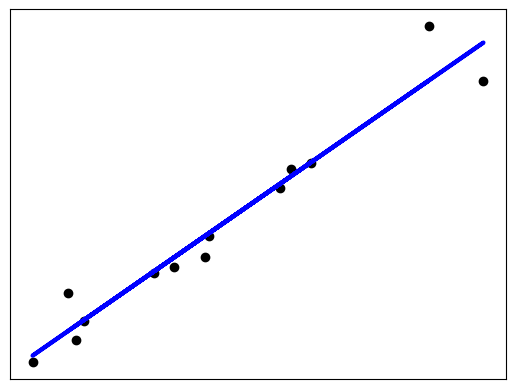

In [9]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [10]:
regr.coef_

array([[3495678.05852633]])

In [11]:
regr.intercept_

array([-71581951.51125664])

In [12]:
def lin_regr_species(species):
    df = merged_df.loc[merged_df.index.str.contains(species)]
    x = df['size_Mb'].values
    y = df['distinct_31mers'].values
    length = len(df.index)
    x = x.reshape(length, 1)
    y = y.reshape(length, 1)
    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    plt.scatter(x, y,  color='black')
    plt.plot(x, regr.predict(x), color='blue', linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    return regr

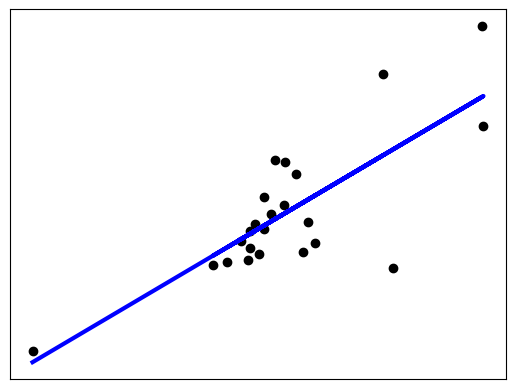

In [13]:
regr_ecoli =  lin_regr_species('escherichia_coli')

In [14]:
regr_ecoli.coef_, regr_ecoli.intercept_

(array([[761080.27259291]]), array([30904974.93481824]))

In [17]:
regr.predict(np.array([64]).reshape(1, -1))

array([[1.52141444e+08]])